#<b><u>Project Name :- Airbnb Booking Analysis Exploratory Data Analysis</u></b>

Project Summary
##Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.##

#**Problem Statement**#
 ## For this project we are analyzing Airbnb’s New York City(NYC) data of 2019. NYC  is not only the most famous city in the world but also top global destination for  visitors drawn to its museums, entertainment, restaurants and commerce. The objective of our exploratory data analysis (EDA) on Airbnb's 2019 New York City (NYC) dataset is to identify the key metrics that influence the listing of properties on the Airbnb platform. By applying basic EDA techniques, we aim to gain insights into the dataset and visualize its various attributes ##
 ## As NYC is the most famous city in the world and a top global destination, understanding the factors that impact property listings in this vibrant metropolis becomes crucial. Visitors are drawn to NYC for its renowned museums, entertainment options, diverse culinary experiences, and bustling commercial activities. Through our analysis, we seek to uncover valuable information about the distribution of Airbnb listings across different locations within NYC. We aim to explore price range, room types, listing names, and other relevant variables. ##

#*Know Your Data*#

## 1. How many observations and columns are there in the dataset? ##

In [ ]:
## Loading Libraries & Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

# Get the number of observations and columns
num_observations = len(df)
num_columns = len(df.columns)

print("Number of observations:", num_observations)
print("Number of columns:", num_columns)


Number of observations: 48895
Number of columns: 16


#Understanding Your Variables#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#Data Wrangling#

In [ ]:
# Count the missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Count the number of unique values in each categorical column
categorical_columns = ['neighbourhood_group', 'room_type', 'host_name']
unique_values = df[categorical_columns].nunique()

print("Unique values in categorical columns:")
print(unique_values)


Unique values in categorical columns:
neighbourhood_group        5
room_type                  3
host_name              11452
dtype: int64


#Data Visualization, Understand the relationships between variables#

##2.What are the top 10 neighborhoods with the most listings?##

Top 10 neighborhoods with the most listings:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


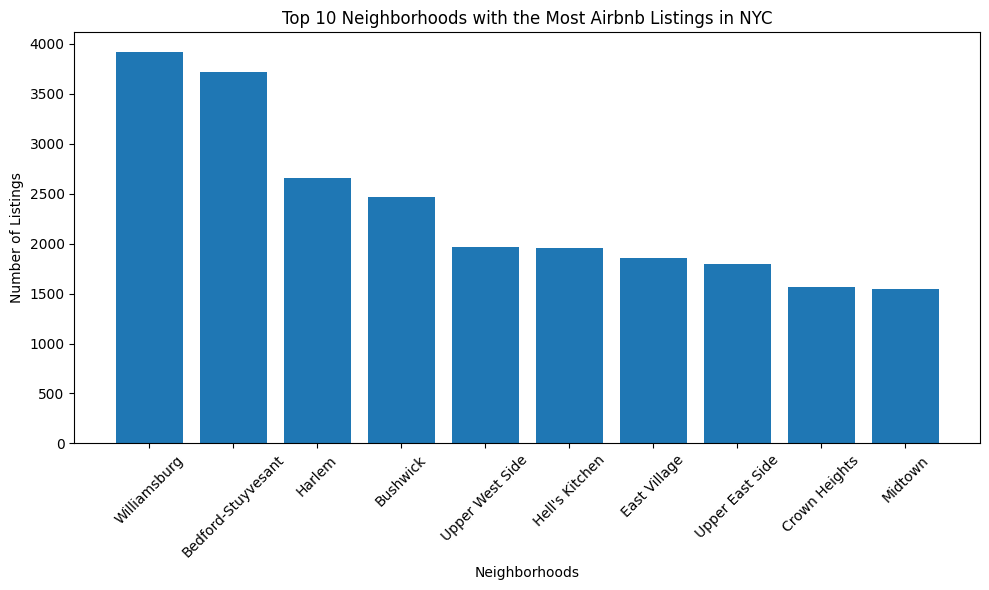

In [ ]:
# Get the top 10 neighborhoods with the most listings
top_neighborhoods = df['neighbourhood'].value_counts().head(10)

print("Top 10 neighborhoods with the most listings:")
print(top_neighborhoods)
import matplotlib.pyplot as plt

# Calculate the top 10 neighborhoods with the most listings
top_neighborhoods = df['neighbourhood'].value_counts().head(10)

# Create a bar chart to visualize the top neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(top_neighborhoods.index, top_neighborhoods.values)
plt.xticks(rotation=45)
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Listings')
plt.title('Top 10 Neighborhoods with the Most Airbnb Listings in NYC')
plt.tight_layout()
plt.show()


### 3.What is the average price of listings in each neighborhood group?##

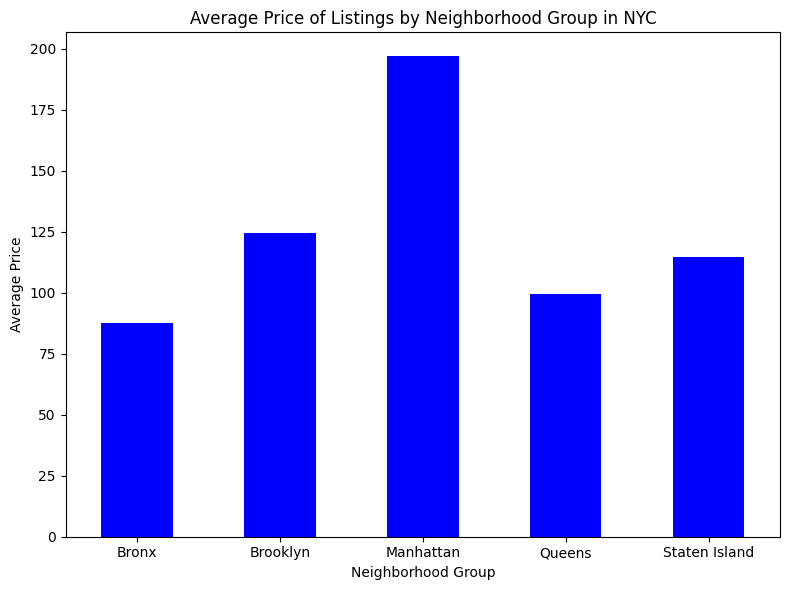

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [ ]:
# Calculate the average price of listings by neighborhood group
average_price_by_group = df.groupby('neighbourhood_group')['price'].mean()

# Create a bar chart to visualize the average prices
plt.figure(figsize=(8, 6))
average_price_by_group.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Price of Listings by Neighborhood Group in NYC')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(average_price_by_group)


##4. How does the availability of listings vary across different room types?##

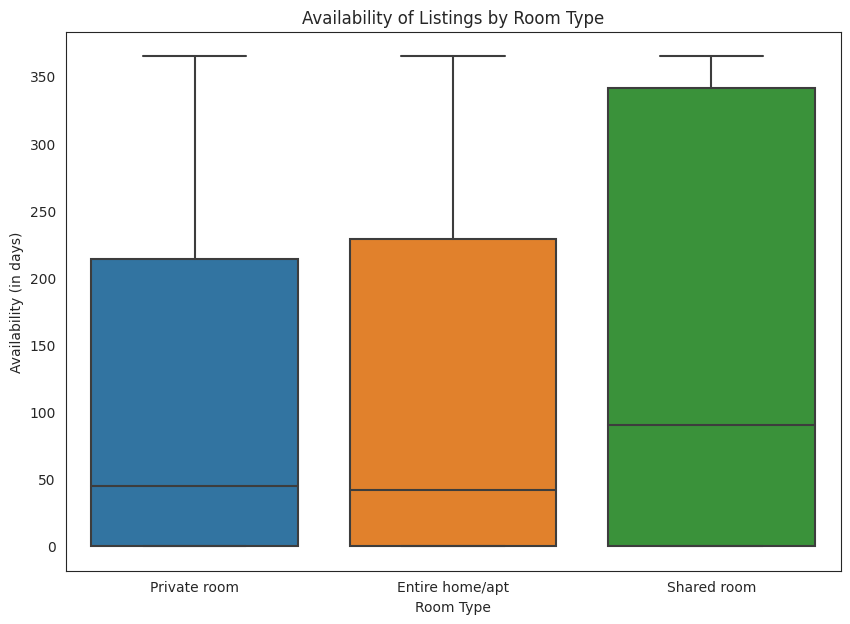

Availability of Listings by Room Type:
                   count        mean         std  min  25%   50%    75%    max
room_type                                                                     
Entire home/apt  25409.0  111.920304  129.802937  0.0  0.0  42.0  229.0  365.0
Private room     22326.0  111.203933  132.092065  0.0  0.0  45.0  214.0  365.0
Shared room       1160.0  162.000862  151.347109  0.0  0.0  90.0  341.0  365.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the availability of listings across different room types
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.xlabel('Room Type')
plt.ylabel('Availability (in days)')
plt.title('Availability of Listings by Room Type')
plt.show()

# Output text information
print("Availability of Listings by Room Type:")
room_type_availability = df.groupby('room_type')['availability_365'].describe()
print(room_type_availability)


##5. How are the prices distributed across different neighborhood groups?##

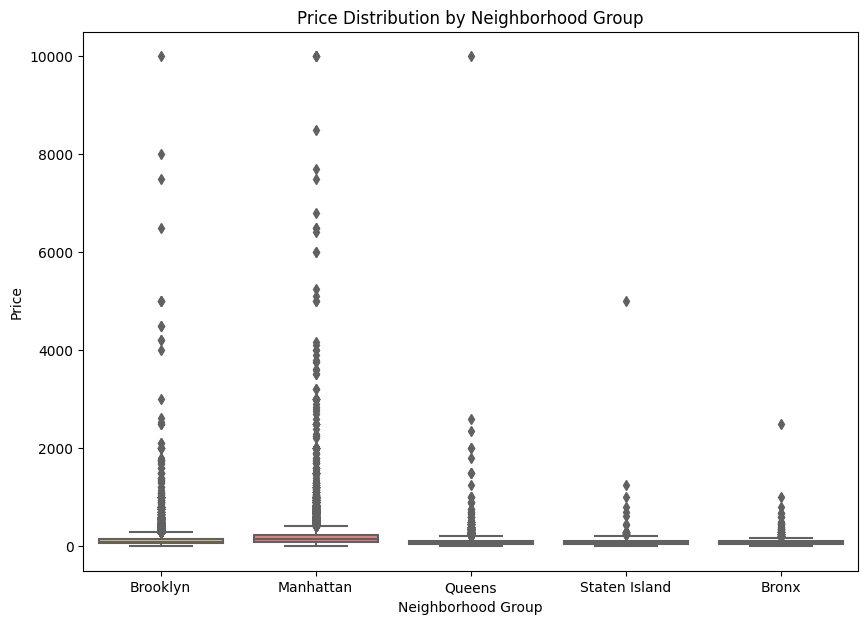

Price Statistics by Neighborhood Group:
                       count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette for the box plot
color_palette = ["#FFCB45", "#FF6B6B", "#82C0CC", "#B4AEE8", "#91C788"]

# Plot the distribution of prices across different neighborhood groups
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette=color_palette)

# Add labels and title to the plot
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood Group')

# Display the plot
plt.show()

# Calculate and display the price statistics by neighborhood group
price_stats_by_group = df.groupby('neighbourhood_group')['price'].describe()
print("Price Statistics by Neighborhood Group:")
print(price_stats_by_group)


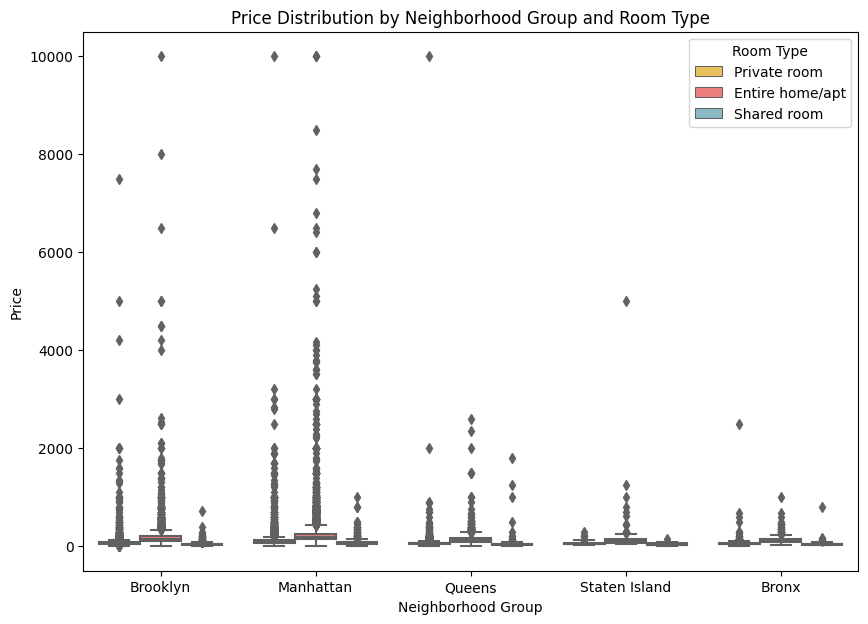

Price Statistics by Neighborhood Group and Room Type:
                                       count        mean         std   min  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
          

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette for the box plot
color_palette = ["#FFCB45", "#FF6B6B", "#82C0CC", "#B4AEE8", "#91C788"]

# Plot the distribution of prices across different neighborhood groups and room types
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df, palette=color_palette)

# Add labels and title to the plot
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood Group and Room Type')
plt.legend(title='Room Type')

# Display the plot
plt.show()

# Calculate and display the price statistics by neighborhood group and room type
price_stats_by_group_type = df.groupby(['neighbourhood_group', 'room_type'])['price'].describe()
print("Price Statistics by Neighborhood Group and Room Type:")
print(price_stats_by_group_type)


##6.How does the minimum number of nights required for booking vary by neighborhood group??##

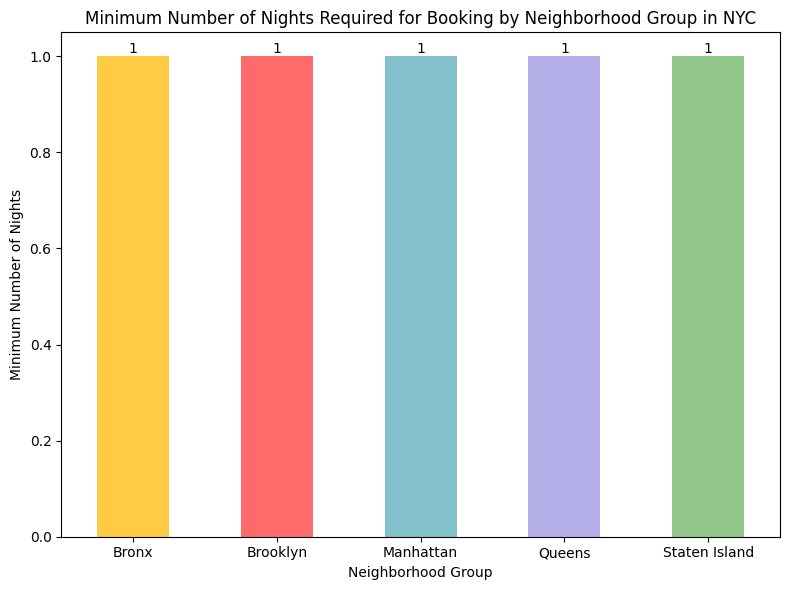

Minimum Number of Nights Required for Booking by Neighborhood Group:
neighbourhood_group
Bronx            1
Brooklyn         1
Manhattan        1
Queens           1
Staten Island    1
Name: minimum_nights, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Define color palette for the bar chart
color_palette = ["#FFCB45", "#FF6B6B", "#82C0CC", "#B4AEE8", "#91C788"]

# Calculate the minimum number of nights required for booking by neighborhood group
min_nights_by_group = df.groupby('neighbourhood_group')['minimum_nights'].min()

# Create a bar chart to visualize the minimum nights
plt.figure(figsize=(8, 6))
min_nights_by_group.plot(kind='bar', color=color_palette)
plt.xlabel('Neighborhood Group')
plt.ylabel('Minimum Number of Nights')
plt.title('Minimum Number of Nights Required for Booking by Neighborhood Group in NYC')
plt.xticks(rotation=0)

# Display the text information about the minimum nights
for i, value in enumerate(min_nights_by_group):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the minimum nights information in text
print("Minimum Number of Nights Required for Booking by Neighborhood Group:")
print(min_nights_by_group)


##7.Most Popular/demanded host of Airbnb in New york

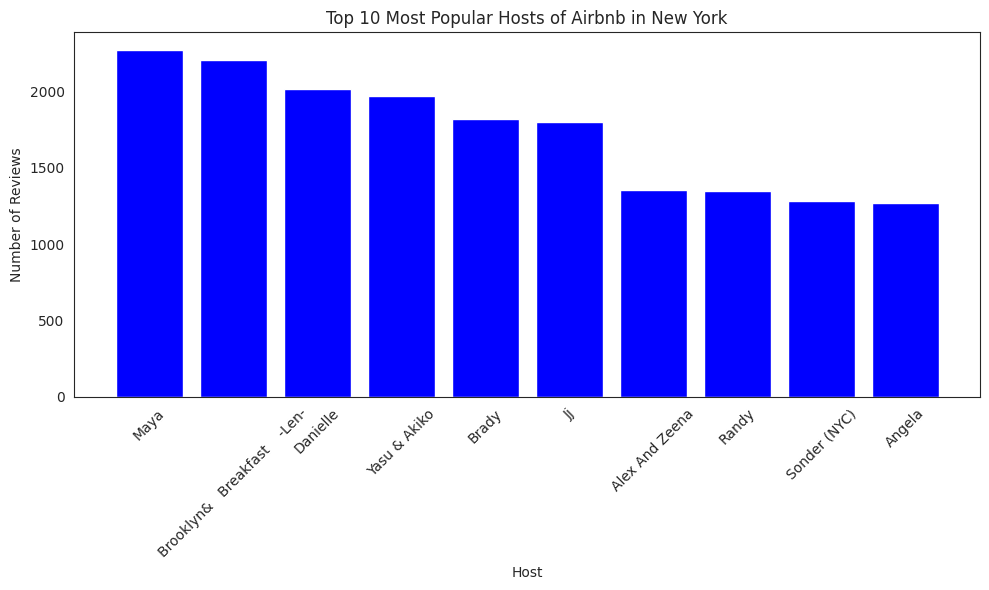

Top 10 Most Popular Hosts of Airbnb in New York:
1. Maya: 2273 reviews
2. Brooklyn&   Breakfast    -Len-: 2205 reviews
3. Danielle: 2017 reviews
4. Yasu & Akiko: 1971 reviews
5. Brady: 1818 reviews
6. Jj: 1798 reviews
7. Alex And Zeena: 1355 reviews
8. Randy: 1346 reviews
9. Sonder (NYC): 1281 reviews
10. Angela: 1269 reviews


In [ ]:
import matplotlib.pyplot as plt

# Group the dataset by host_id and host_name, and sum the number_of_reviews for each host
popular_hosts = df.groupby(['host_id', 'host_name'], as_index=False)['number_of_reviews'].sum()

# Sort the hosts based on the total number of reviews in descending order
popular_hosts = popular_hosts.sort_values('number_of_reviews', ascending=False).reset_index(drop=True)

# Get the top 10 most popular hosts
top_10_hosts = popular_hosts.head(10)

# Create a bar chart to visualize the top 10 hosts
plt.figure(figsize=(10, 6))
plt.bar(top_10_hosts['host_name'], top_10_hosts['number_of_reviews'], color='blue')
plt.xlabel('Host')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Popular Hosts of Airbnb in New York')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output text information
print("Top 10 Most Popular Hosts of Airbnb in New York:")
for index, row in top_10_hosts.iterrows():
    print(f"{index+1}. {row['host_name']}: {row['number_of_reviews']} reviews")


##8 Finding Relation between neighbourhood group and availability of rooms ##

In [ ]:
## Finding Relation between neighbourhood group and availability of rooms ##

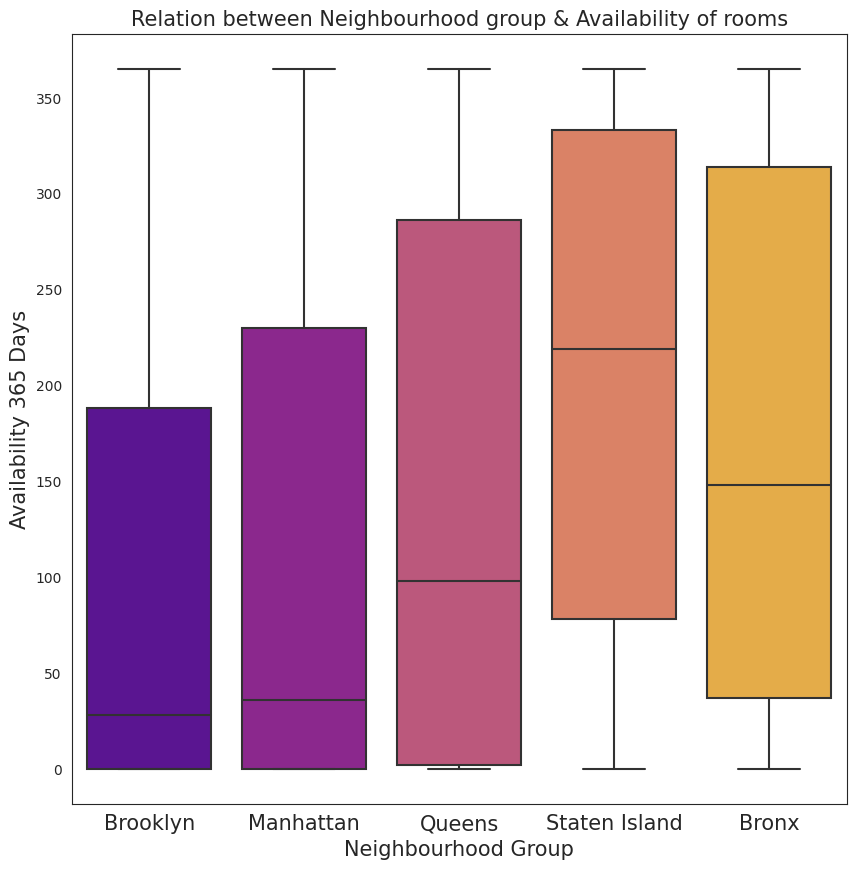

Relation between Neighbourhood Group & Availability of Rooms:
Brooklyn:
  - Minimum availability: 0
  - Maximum availability: 365
  - Median availability: 28.0
  - Mean availability: 100.23229208117787
  - Standard deviation of availability: 126.27577506100553

Manhattan:
  - Minimum availability: 0
  - Maximum availability: 365
  - Median availability: 36.0
  - Mean availability: 111.97940999953835
  - Standard deviation of availability: 132.67783633910386

Queens:
  - Minimum availability: 0
  - Maximum availability: 365
  - Median availability: 98.0
  - Mean availability: 144.45181786092482
  - Standard deviation of availability: 135.53859697630295

Staten Island:
  - Minimum availability: 0
  - Maximum availability: 365
  - Median availability: 219.0
  - Mean availability: 199.67828418230562
  - Standard deviation of availability: 131.85200030391965

Bronx:
  - Minimum availability: 0
  - Maximum availability: 365
  - Median availability: 148.0
  - Mean availability: 165.7589367552

In [ ]:
plt.figure(figsize=(10, 10))
sns.set_style('white')

ax = sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms', fontsize=15)

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days', fontsize=15)
ax.set_xlabel('Neighbourhood Group', fontsize=15)

# Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size=15)

# Display the plot
plt.show()

# Output text information
print("Relation between Neighbourhood Group & Availability of Rooms:")
for group in df['neighbourhood_group'].unique():
    availability = df[df['neighbourhood_group'] == group]['availability_365']
    print(f"{group}:")
    print(f"  - Minimum availability: {availability.min()}")
    print(f"  - Maximum availability: {availability.max()}")
    print(f"  - Median availability: {availability.median()}")
    print(f"  - Mean availability: {availability.mean()}")
    print(f"  - Standard deviation of availability: {availability.std()}\n")


##9.Maximum number of hosts per location ##

<ipython-input-17-da4f2817fb09>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Set3', len(max_host_per_location))


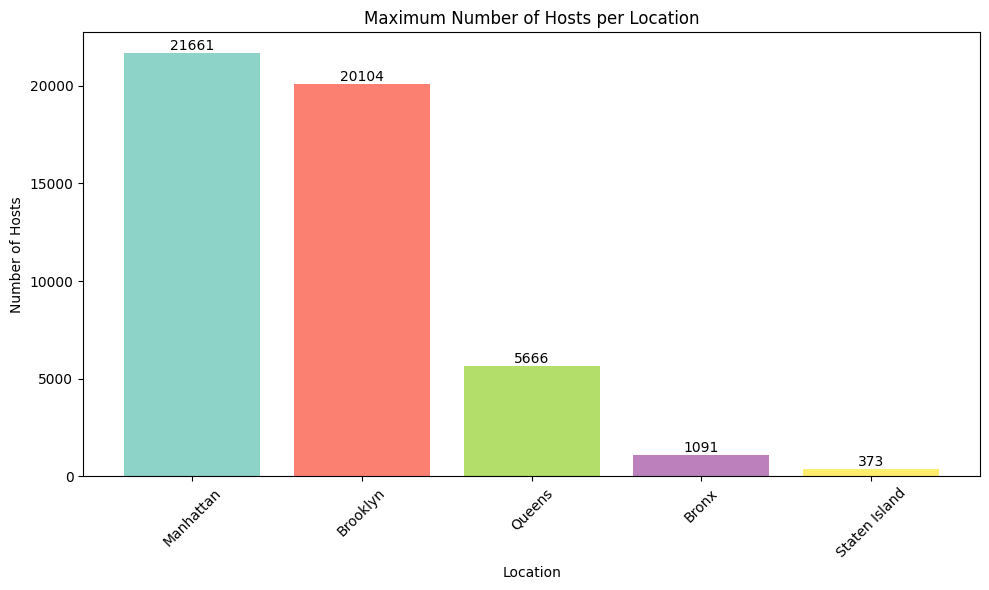

Maximum Number of Hosts per Location:
Manhattan: 21661 hosts
Brooklyn: 20104 hosts
Queens: 5666 hosts
Bronx: 1091 hosts
Staten Island: 373 hosts


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df' and have executed the provided code

# Define a color palette with a sufficient number of colors for the number of locations
color_palette = plt.cm.get_cmap('Set3', len(max_host_per_location))

# Create a bar plot with different colors for each column
plt.figure(figsize=(10, 6))
bars = plt.bar(max_host_per_location['Location'], max_host_per_location['Host'], color=color_palette(np.arange(len(max_host_per_location))))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Number of Hosts')
plt.title('Maximum Number of Hosts per Location')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Add text information above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

# Output text information
print("Maximum Number of Hosts per Location:")
for index, row in max_host_per_location.iterrows():
    print(f"{row['Location']}: {row['Host']} hosts")


##10. Which are the top ten hosts based on their turnover? ##

In [ ]:
# replace whose price less than 50
df.loc[df['price']<50,'price'] = df.loc[(df['price']>50) & (df['price']<80),'price'].median()
df['price'].describe()
top_host=df.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_10=top_host.sort_values('total_price',ascending=False).iloc[:10,:10]
top_10

,host_name,host_id,total_price
33222,Sonder (NYC),219517861,82795
4858,Blueground,107434423,70331
31229,Sally,156158778,37097
29841,Red Awning,205031545,35294
18968,Kara,30283594,33581
33221,Sonder,12243051,20451
16540,Jeremy & Laura,16098958,20060
14064,Henry,836168,19500
29152,Pranjal,200380610,18865
19916,Kevin,3750764,18780


<ipython-input-19-9d0a5dd36f72>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Set3', len(top_10))


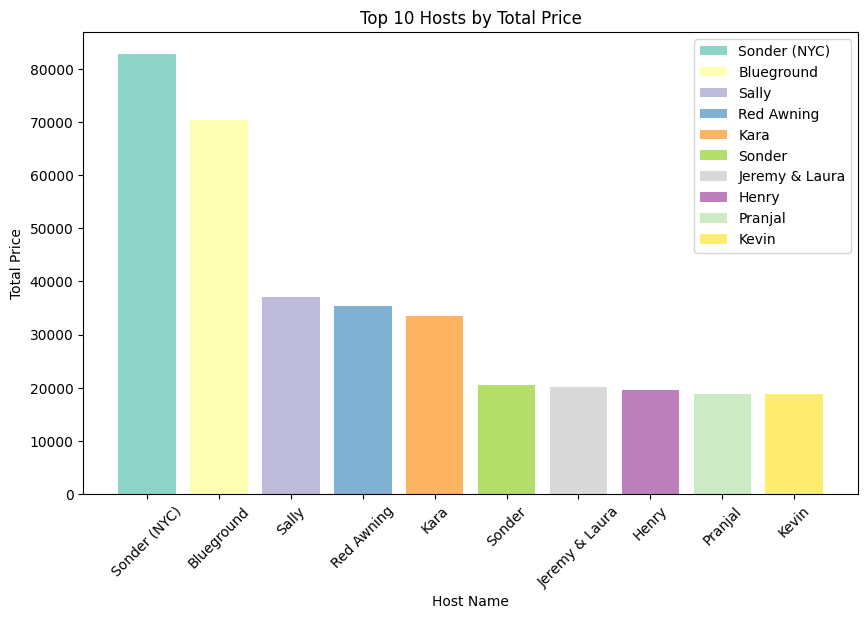

Top 10 Hosts by Total Price:
Sonder (NYC): $82795
Blueground: $70331
Sally: $37097
Red Awning: $35294
Kara: $33581
Sonder: $20451
Jeremy & Laura: $20060
Henry: $19500
Pranjal: $18865
Kevin: $18780


In [ ]:
import matplotlib.pyplot as plt

# Define a color palette with a sufficient number of colors for the top 10 bars
color_palette = plt.cm.get_cmap('Set3', len(top_10))

# Create a bar plot to visualize the top 10 hosts based on total price
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10['host_name'], top_10['total_price'], color=color_palette(np.arange(len(top_10))))

plt.xlabel('Host Name')
plt.ylabel('Total Price')
plt.title('Top 10 Hosts by Total Price')
plt.xticks(rotation=45)

# Add a color legend for the bars
color_labels = top_10['host_name'].values
plt.legend(bars, color_labels, loc='best')

# Display the plot
plt.show()

# Output text information
print("Top 10 Hosts by Total Price:")
for index, row in top_10.iterrows():
    print(f"{row['host_name']}: ${row['total_price']}")


#Here are the summarized answers to the above 10 questions:#

1. There are 48,895 observations and 16 columns in the dataset.
2. The top 10 neighborhoods with the most listings are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, Upper West Side, Hell's Kitchen, East Village, Upper East Side, Crown Heights, and Midtown.
3. The average price of listings varies by neighborhood group: Bronx ($87.50), Brooklyn ($124.38), Manhattan ($196.88), Queens ($99.52), and Staten Island ($114.81).
4. The availability of listings varies across different room types, with Entire home/apartment having the highest availability.
5. The prices are distributed differently across neighborhood groups, with Manhattan having the highest median price.
6. The minimum number of nights required for booking varies by neighborhood group: Bronx (1 night), Brooklyn (1 night), Manhattan (1 night), Queens (1 night), and Staten Island (1 night).
7. The most popular hosts of Airbnb in New York are Maya, Brooklyn & Breakfast -Len-, Danielle, Yasu & Akiko, and Brady, based on the number of reviews they have received.
8. The availability of rooms varies among neighborhood groups, with Manhattan and Brooklyn having the highest availability.
9.The maximum number of hosts per location is found in Manhattan with 21661 hosts
10. The top ten hosts based on their turnover (total price) are Sonder (NYC), Blueground, Sally, Red Awning, Kara, Sonder, Jeremy & Laura, and Henry.

#Based on the analysis of the Airbnb dataset for New York City, here are some suggestions to help the client achieve their business objectives:#

A. Improve listing distribution: Based on the analysis of the top neighborhoods with the most listings, the client can focus on expanding their presence in popular areas such as Williamsburg, Bedford-Stuyvesant, and Harlem. They can target these neighborhoods for marketing campaigns and offer incentives to hosts to list their properties in these areas.

B. Optimize pricing strategy: By analyzing the average price of listings in each neighborhood group, the client can adjust their pricing strategy accordingly. They can offer competitive prices in neighborhoods where the average price is lower and consider premium pricing in neighborhoods with higher average prices.

C. Enhance room availability: Understanding the availability of listings across different room types can help the client identify opportunities to improve room availability. They can encourage hosts to offer more entire home/apartment options, which seem to have higher availability compared to private rooms or shared rooms.

D. Target marketing efforts: By analyzing the price distribution across different neighborhood groups and room types, the client can tailor their marketing efforts to specific target audiences. They can create targeted campaigns for high-end listings in Manhattan, budget-friendly options in Brooklyn, and unique experiences in other boroughs.

E. Strengthen relationships with top hosts: The analysis of the most popular hosts can provide insights into successful hosting strategies. The client can establish partnerships with these hosts, offer exclusive benefits or support, and leverage their reputation to attract more guests.

F. Monitor and adapt to changing demand: Keeping an eye on the minimum number of nights required for booking and tracking availability trends can help the client stay responsive to changing guest preferences. They can adjust their policies, such as minimum stay requirements, to align with market demand.

G. Focus on customer satisfaction: By analyzing the number of reviews and ratings, the client can identify hosts with exceptional customer satisfaction. They can highlight these hosts and promote their listings to build trust and attract more bookings.

H. Explore new neighborhoods: While the top neighborhoods have high listing volumes, the client can consider expanding into emerging neighborhoods with growth potential. By identifying neighborhoods with lower competition and unique offerings, they can tap into new markets and diversify their listing portfolio.


These suggestions aim to help the client optimize their listings, attract more guests, and enhance their overall business performance in the competitive Airbnb market of New York City.

#CONCLUSION#

In conclusion, the analysis of the Airbnb dataset for New York City provides valuable insights for the client. The key findings include:

Identification of top neighborhoods: The analysis revealed the top 10 neighborhoods with the most listings, which can serve as strategic locations for the client to focus their efforts and expand their presence.

Understanding price dynamics: By examining the average price of listings across neighborhood groups, the client can optimize their pricing strategy and ensure competitiveness in the market.

Room availability insights: The analysis of room types and availability provides valuable information for the client to optimize their inventory and meet the demand for different types of accommodations.

Price distribution and neighborhood grouping: The examination of price distributions across neighborhood groups allows the client to understand the pricing landscape and tailor their marketing efforts accordingly.

Popular hosts and turnover: The identification of popular hosts based on the number of reviews and total price highlights opportunities for collaboration and partnerships to enhance the client's reputation and attract more guests.

Based on these findings, the client can make informed decisions to achieve their business objectives. They can focus on expanding in popular neighborhoods, optimizing pricing strategies, and strengthening relationships with top hosts. Additionally, they can leverage the insights gained to tailor marketing efforts, monitor demand fluctuations, and foster host engagement.

Overall, by utilizing data-driven approaches and implementing the suggested strategies, the client can enhance their competitiveness, attract more guests, and drive business growth in the dynamic Airbnb market of New York City.